# Boston House prices

## GMIT Data Analytics 
### Machine Learning and Statistics 
#### Assignment 2019


![boston](img/Boston.jpg)


# research

[link](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)
[link eile](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

[more link](https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341)




## References

## Describe the Boston Housing Dataset

### The dataset

### background

<img src="img/house.png" alt="house" style="width: 500px;"/>

The Boston housing data set originated in a 1978 paper titled *'Hedonic prices and the demand for clean air'* in the journal **Environment, Economics & Management, vol.5**. The papers authors, Harrison and Rubinfeld discussed using census housing data to estimate the degree to which people will pay for anti pollution measures and how this can prove methodologically problematic. 

The **hedonic price method** is an economic pricing model that infers the price of an item (such as  housing) by looking at analogous data such as environmental features, goods or services (e.g location of property, shopping districts, access to quality schools, crime rates etc). 

Each surrogate feature comes with a cost or benefit that the market (e.g. people who buy houses) considers in assessing what a fair price is for the property. People pay more for a house close to a good school or in a nice low crime neigbourhood. A similar property in a more challenging area would be marketed at a lower price as the market would expect a discount to  compensation for poorer utility. ref(http://www.cbabuilder.co.uk/Quant5.html)

Harrison and Rubinfeld, 1978 found that small increases in air pollution damage are positively correlated with air pollution levels (as expected) and greater household income. That is more expensive houses were in marginally worse air quality areas. They found that the households willingness to pay for clean air was very sensitive to the factors used in the hedonic pricing model rather than depending on the price elasticity of the air quality demand equation. [ref](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)


The data was downloaded from an archived page of UCI Machine Learning Repository [ref](https://archive.fo/5RkVv#selection-6.3-855.2). The data itself was taken from the US census in particular the Boston Standard Metropolitan Statistical Area (SMSA) census tracts from 1970 [ref the paper by h&r](). It is a record of hedonic housing data from various regions around Boston city. Each row contains data relating to a specific region of Boston. In sum there are fourteen measures (the columns) and 506 geographical regions sampled (the rows). [REF](https://webcache.googleusercontent.com/search?q=cache:8C4R8IZYvpgJ:https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset+&cd=3&hl=en&ct=clnk&gl=ie&client=firefox-b-d)

The dataset contained no null or missing values. The information contained in the dataset deals with hedonic measures of housing in the suburbs around Boston USA. The 14 fields are as follows. 

1. CRIM: This measures the per capita crime rate by town
2. ZN: This measures the proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: This measures the proportion of non-retail business acres per town
4. CHAS: This is the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: This measures the nitric oxides concentration (parts per 10 million)
6. RM: This measures the average number of rooms per dwelling
7. AGE: This measures the proportion of owner-occupied units built prior to 1940
8. DIS: This measures the weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: This measures the full-value property-tax rate per \$10,000
11. PTRATIO: This measures the pupil-teacher ratio by town
12. B: This measures the 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (very racist!!)
13. LSTAT: This measures the \% lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's

[ref](https://archive.fo/5RkVv#selection-6.3-855.2)


The data can be found at the above link but it is also included with the python package sklearn



### imports

The following python packages were used in analysing the dataset.

In [1]:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import pandas as pd



In [2]:
# using the data from machine learning repository 
# specify the column names
names =["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
# Read the csv and convert it to a a dataframe with  one white space as seperator 
df =  pd.read_csv('data/housing.data.csv',  sep='\s+', header = None, names = names, engine='python') # no headers
print(df)
print(df.head())
print(df.tail())
print(df.describe())
print(df.nunique())

if df.isnull().empty:
    print("Null values present")
else:   
    print("No missing values")


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   

lets see what the sklearn one looks like

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset)
print(boston_dataset.keys())
print(boston_dataset.DESCR)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

## only 13 headings!! MEDV Missing - read the DESCR


#MEDV is stored in target
boston_dataset.target
# Add target to the boston database
boston['MEDV'] = boston_dataset.target
boston.head()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#compare with the csv database
ne = (df != boston).any(1)
ne

0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22      True
23      True
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
476    False
477    False
478    False
479    False
480     True
481     True
482    False
483    False
484    False
485     True
486    False
487     True
488    False
489    False
490     True
491     True
492    False
493    False
494    False
495    False
496    False
497    False
498     True
499    False
500     True
501     True
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [5]:
df.where(df.values==boston.values).notna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
# look at some of the false values in CRIM
print(df.iloc[3, 0])
print(boston.iloc[3,0])
print(df.iloc[14, 0])
print(boston.iloc[14,0])
print(df.iloc[21, 0])
print(boston.iloc[21,0])
print(df.iloc[22, 0])
print(boston.iloc[22, 0])
print(df.iloc[23, 0])
print(boston.iloc[23, 0])




0.032369999999999996
0.03237
0.6379600000000001
0.63796
0.8520399999999999
0.85204
1.2324700000000002
1.23247
0.9884299999999999
0.98843


 looks to be rounding errors

In [7]:
df["CRIM"]=df.round({"CRIM":5})
df
df.where(df.values==boston.values).notna()
ne = (df != boston).any(1)
ne
if ne.any:
    print("same databases")
else:
    print("different databases")

same databases


The two dataframes are the same  - Ill use the csv one for now but I might change to the boston one later.

the values that we will be looking at are the house prices df\["MEDV"\] - no it says to look at the dataset not a field on it.

# descriptive statistics

In [8]:
df["MEDV"].describe()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


for reference

1. CRIM: CRIME
2. ZN:  residential land zoned for lots over 25,000 sq.ft.
3. INDUS:  proportion of non-retail business acres per town
4. CHAS: This is the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) ?? no idea what that is
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: This measures the average number of rooms per dwelling
7. AGE: This measures the proportion of owner-occupied units built prior to 1940
8. DIS: This measures the weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: This measures the full-value property-tax rate per \$10,000
11. PTRATIO: This measures the pupil-teacher ratio by town
12. B: This measures the 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (very racist!!)
13. LSTAT: This measures the \% lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's


What would I expect this data to show? I would expect high crime to reduce house prices, high res zone to increase prices as big house area means more expensive houses but I suspect its more complicated than that. high industry I'd expect this to reduce house prices up to a point. If the area is very industriliseed then house prices might be lower (or higher as more workers want to live close to work) - Id expect a non linear correlation here. NOX - I'd expect high polution areas to reduce house prices. I'd expect more rooms to increase house prices. I'd expect older people to be  more represented as home owners. I'd expect distance to work to have a complex relationship. house prices close to work would be more expensive but as long as the commute was reasonable I'd suspect subarb housing to also be expensive. I'd expect that out of the commutter zone the prices would drop. Radical highways? Dont know what radical means in this context - I supect houses beside roads would be more expensive as nearer to work access but also there is a negative utility of living close to traffic so I suppose it depends. Tax, I'd expect higher property tax to be linked to higher house prices but I think its refering to high tax being a disentive to buying a house at a stated price.  PTratio I expect that better ptratio indicates better pupil learning and higher quailty schools so would be positively correlated with house prices. B - very racist to include this in 1978 but I suppose economists dont care what they measure. I suspect that the measure  was included to indcate areas with high african americans homeowners was negatively correlated to house prices, a legacy from jim crow laws!!. LSTAT - I would suspect that areas with lower income people would  have cheaper housing. MEDV this is the value to which the other columns are compared against for the hedonic model of pricing. 

To sum I expect postive correlation with medv and RM, AGE, DIS?, ZN, PTratio; negative correlation with CRIM, NOX, TAX, B, LSTAT and mixed for INDUS, DIS?, RAD  measures 
ignore the CHAS variable  - yikes just read the rest of the assignment - its the charles river data that is to be used to do the predicting




Describe: Create a git - done
make it available to clone - not done
create a jupyter notebook - done
use descriptive statistics and plots to describe the Boston House Prices dataset
Total marks 20%

okay lets look at descriptive stats and plots


In [15]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
df.shape

(506, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [38]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [44]:
df.CRIM.unique()
df.CRIM.value_counts()

14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
0.14103     1
0.03502     1
0.03615     1
0.66351     1
0.12650     1
0.10469     1
0.25356     1
0.10000     1
0.05515     1
0.11027     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
0.02009     1
0.14866     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
           ..
0.05602     1
0.26838     1
0.02177     1
1.83377     1
15.86030    1
7.67202     1
51.13580    1
15.17720    1
8.05579     1
10.06230    1
41.52920    1
0.32264     1
0.04379     1
0.22212     1
0.13117     1
0.51183     1
6.28807     1
0.08826     1
24.80170    1
0.09065     1
23.64820    1
3.56868     1
12.80230    1
0.72580     1
0.03113     1
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

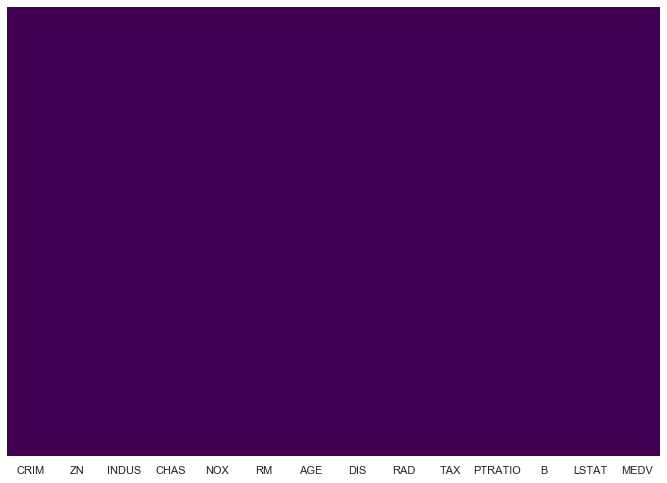

In [45]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis') # no missing values

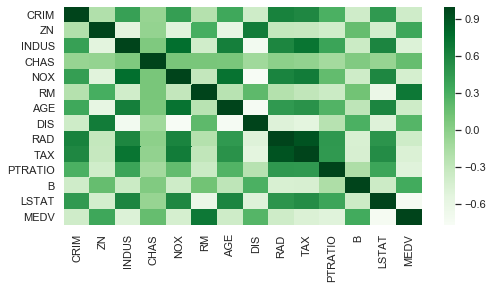

In [48]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='Greens',annot=False)

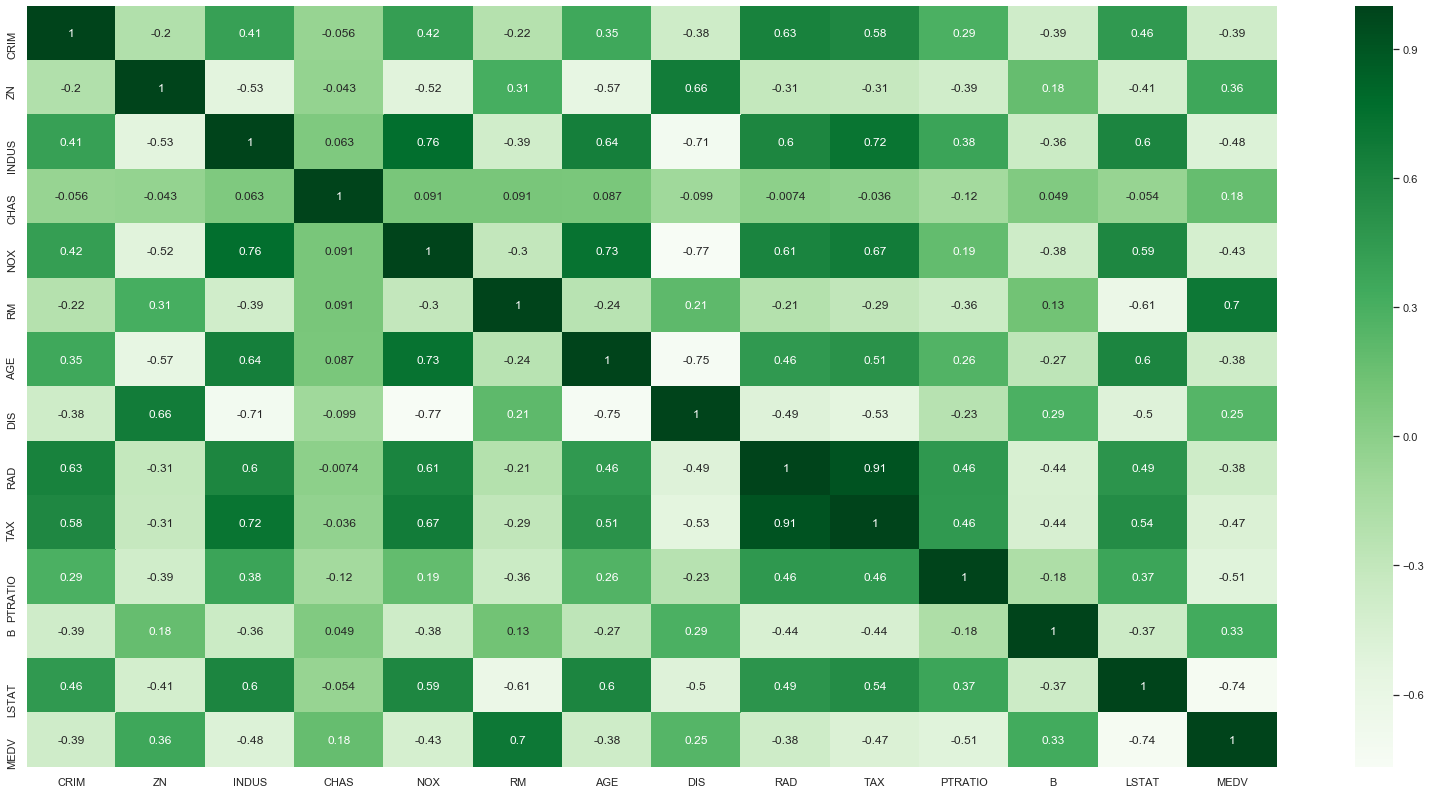

In [50]:
plt.figure(figsize=(28,14))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

areas that look likely to be strongly Corrolated
CRIM and LSTAT, PTRATIO, TAX RAD (strong) AGE, NOX, INDUS
ZN and MEDV, B, DIS (strong), RM, 
INDUS and LSTAT, PTRATIO, TAX (strong), RAD, AGE, NOX, CRIM,
CHAS and nothing much, maybe a bit with MEDV and B
NOX with LSTAT, PTRATIO, TAX, RAD, AGE, INDUS CRIM
RM with MEDV, B, DIS, ZN, 
AGE with LSTAT, PTRATIO, TAX, RAD, NOX, INDUS, CRIM
DIS with MEDV, B, RM, ZN, 
RAD with lSTAT, PTRATIO

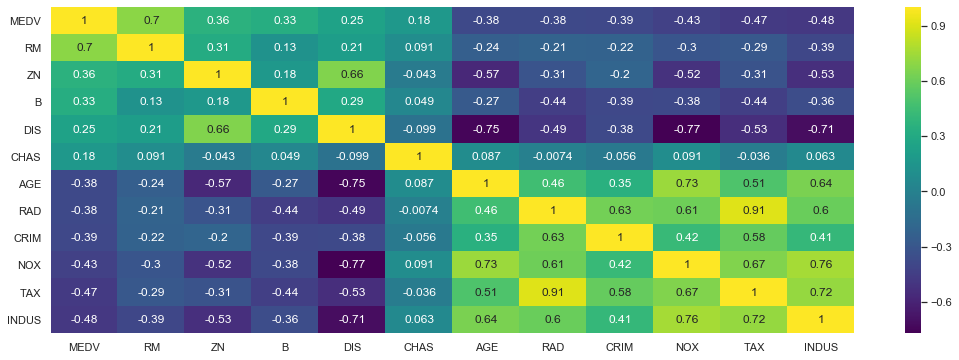

In [54]:
k = 12
cols = df.corr().nlargest(k, 'MEDV')['MEDV'].index
cm = df[cols].corr()
plt.figure(figsize=(18,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

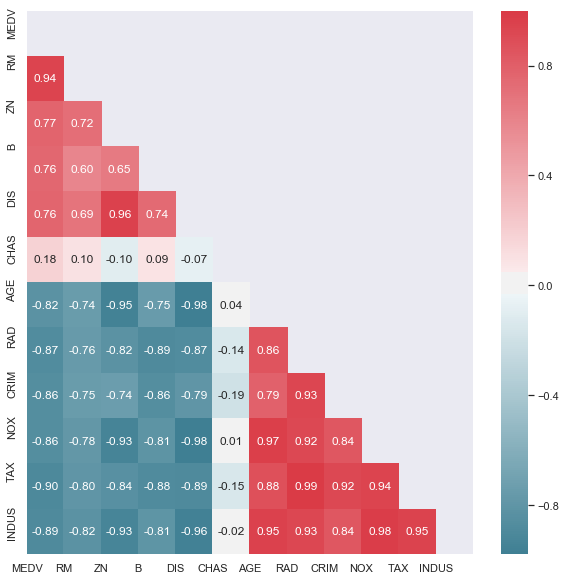

In [95]:

#https://ajh1143.github.io/Corr/
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()
heatMap(cm,False)   

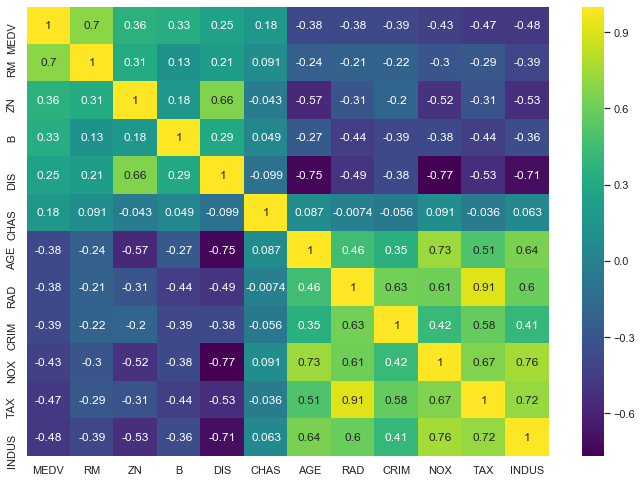

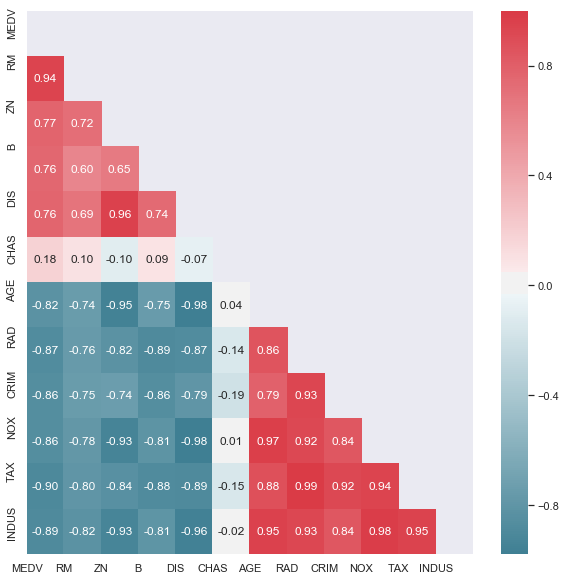

In [89]:
sns.heatmap(cm, annot=True,cmap = 'viridis')
heatMap(cm, False)

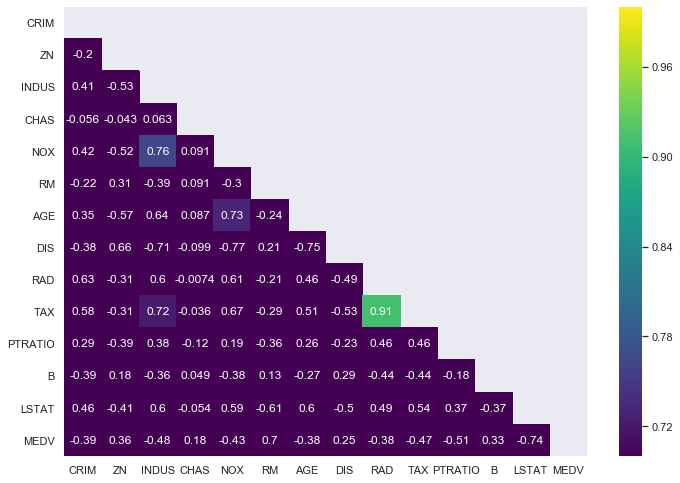

In [114]:
# adapted from https://stackoverflow.com/questions/36560829/seaborn-heatmap-with-frames
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,annot= True, mask = mask, vmin=0.7, cmap = 'viridis')

postive correlation areas over 0.7 to look at is is 
Tax and Rad, Tax and INDUS 
Age and NOX
Nox and Insus

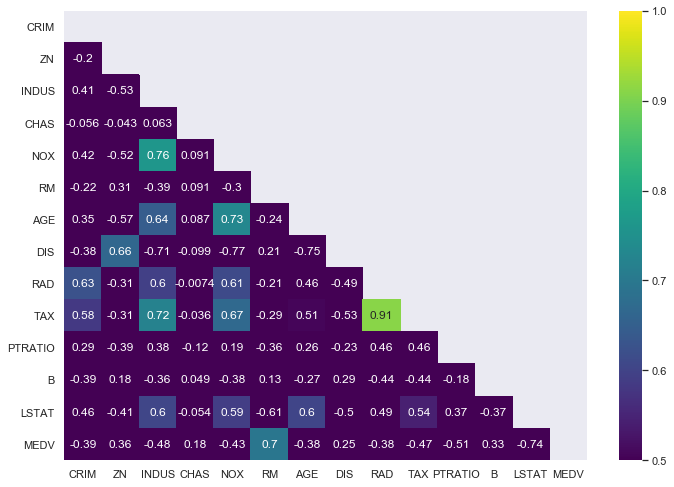

In [115]:
sns.heatmap(corr,annot= True, mask = mask, vmin=0.5, cmap = 'viridis')

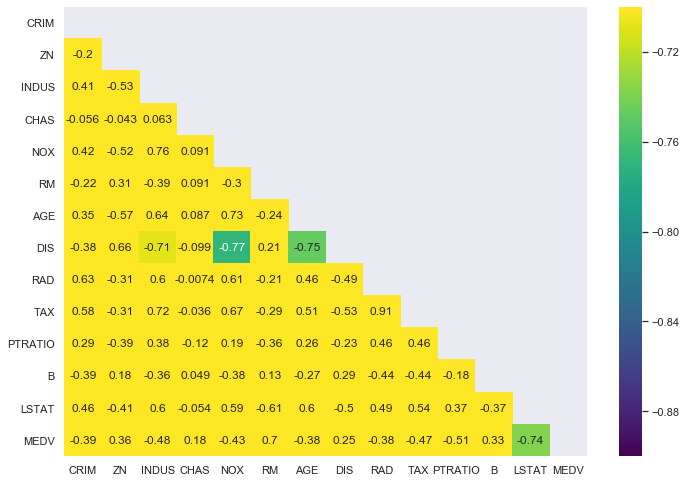

In [113]:
sns.heatmap(corr,annot= True, mask=mask, vmin=-0.7, vmax=-0.9, cmap = 'viridis')

negative correlation (over -0.7) areas  to look at is is 
Dis and Indus, NOx and Age
MEDV and Lstat

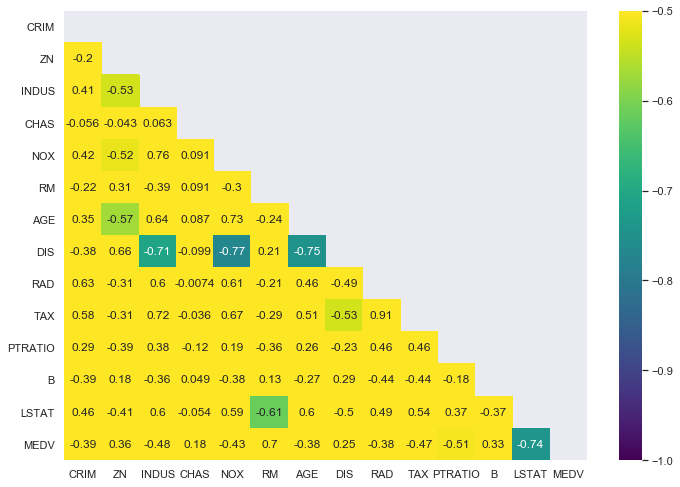

In [119]:
sns.heatmap(corr,annot= True, mask=mask, vmin=-0.5, vmax = -1, cmap = 'viridis')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d57508e7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d57508eeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d57508e358>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5750965f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d575096978>],
 'means': []}

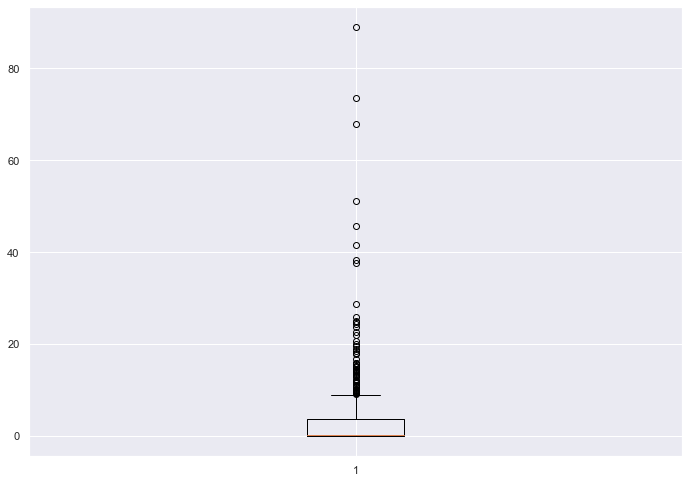

In [20]:
plt.boxplot(df['CRIM'])

Lots of upper end outliers present some quite close to the upper quartile and some substantially away from it. CRIM is crime so there appears to be higher levels of crime in some areas compared to other areas. There are no lower outliers and the level of crime is quite low for the most part with 6 areas being particularly bad for crime at over 40 mark and the a good few areas at the 10 to 30 mark. Crime areas have high level of crime and low crime areas have hardly any. 


In [34]:
df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5750dce80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5750e78d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5750dccf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5750e7fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5750e7f60>],
 'means': []}

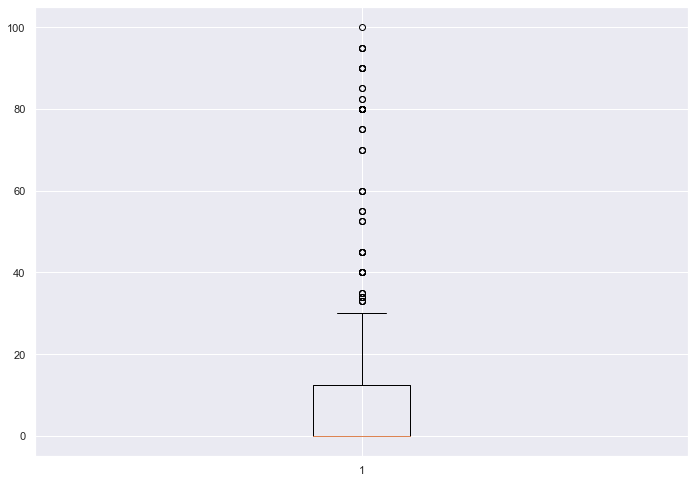

In [21]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['ZN'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d575408fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5754177b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d575408c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d575417eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d575417f98>],
 'means': []}

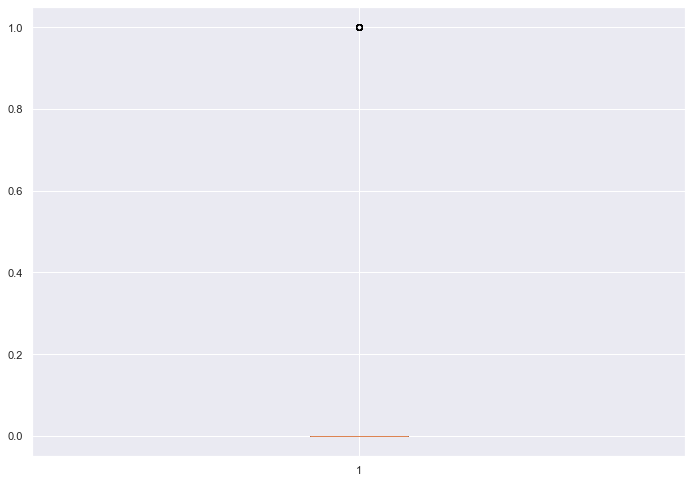

In [22]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['CHAS'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d575466ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d575471668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d575466a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d575471d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d575471e48>],
 'means': []}

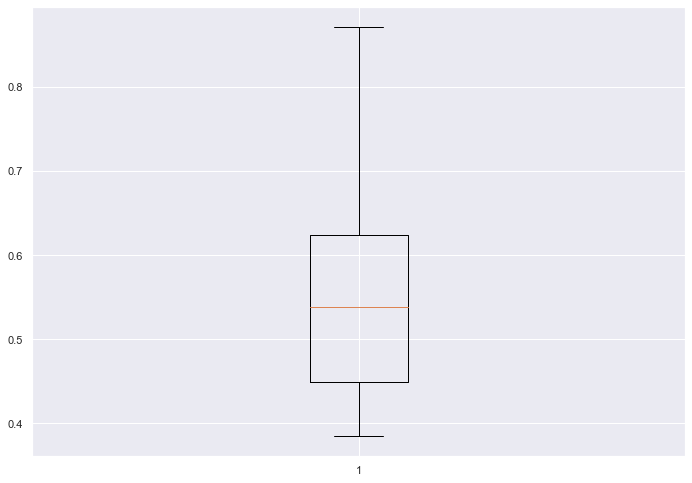

In [23]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['NOX'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d5757638d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d575763d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d575763470>],
 'medians': [<matplotlib.lines.Line2D at 0x1d57576f748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d57576fac8>],
 'means': []}

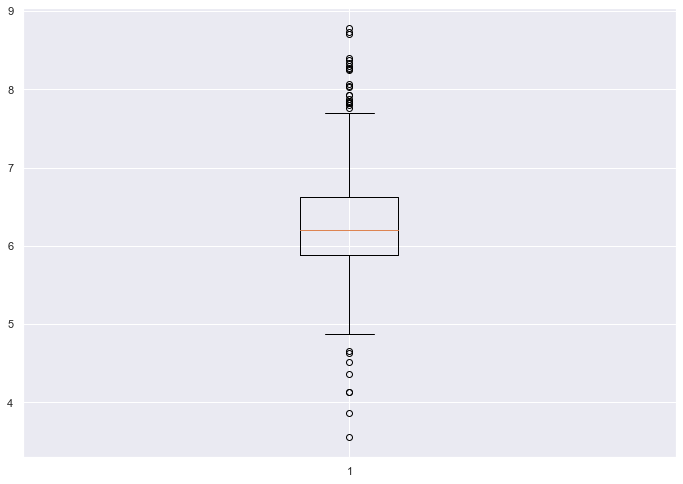

In [24]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['RM'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d5757c25f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5757c2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5757c2198>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5757cc470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5757cc7f0>],
 'means': []}

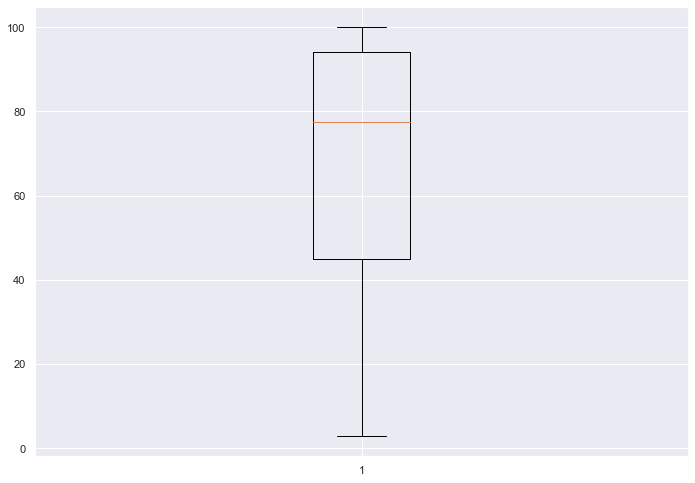

In [25]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['AGE'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d575af2438>,
 'caps': [<matplotlib.lines.Line2D at 0x1d575af2b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d575d25f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1d575af2fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d575b00630>],
 'means': []}

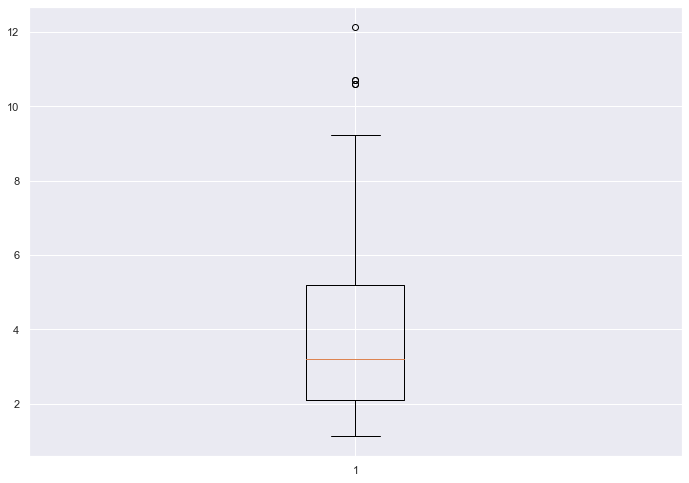

In [26]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['DIS'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d575c98eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d575ca7908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d575c98d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d575ca7d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d575ca7fd0>],
 'means': []}

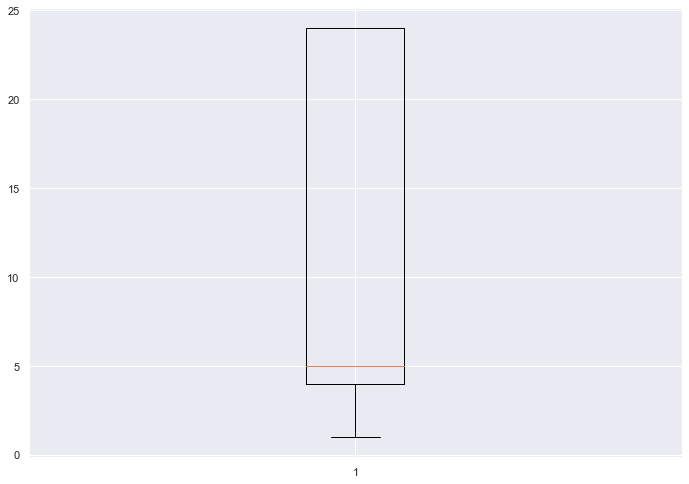

In [27]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['RAD'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d5760c7f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1d575e96710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5760c7b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1d575e96e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d575e96ef0>],
 'means': []}

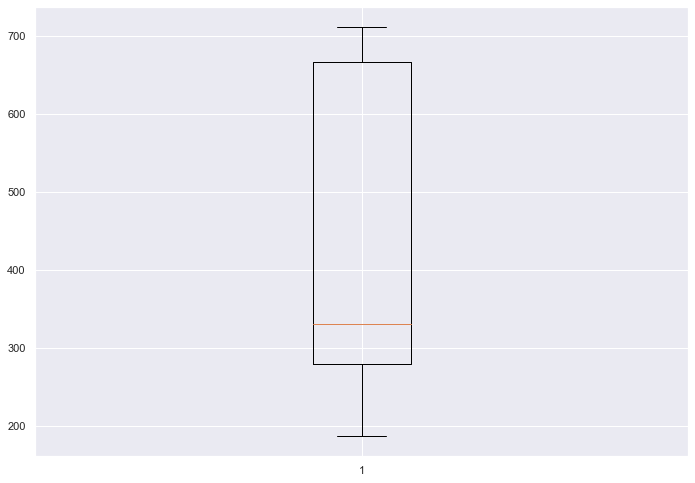

In [28]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['TAX'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d576329f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1d576338978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d576329da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d576338dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d576340438>],
 'means': []}

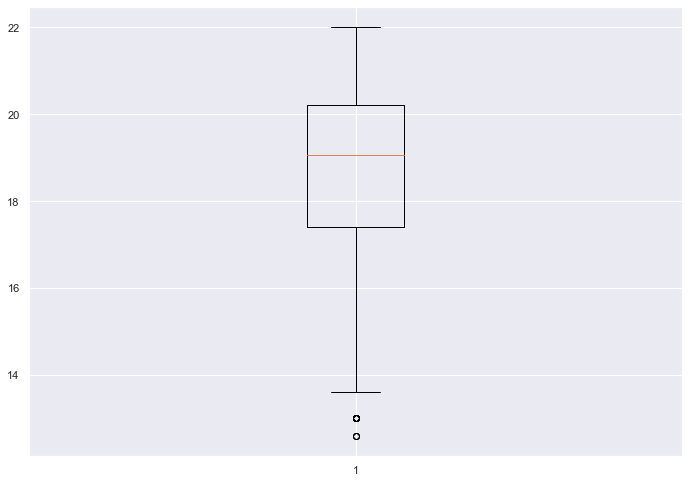

In [30]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['PTRATIO'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d576389be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d576389f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d576389780>],
 'medians': [<matplotlib.lines.Line2D at 0x1d576392a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d576392dd8>],
 'means': []}

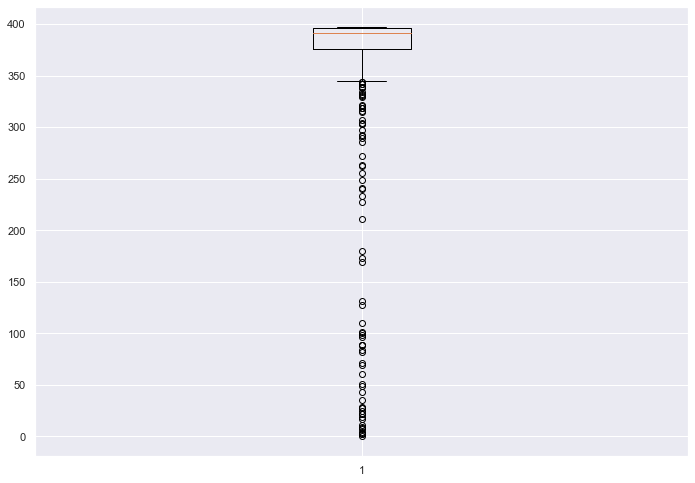

In [31]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['B'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d57458bbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d574ea1a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d57458bc88>],
 'medians': [<matplotlib.lines.Line2D at 0x1d574ea1cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d574865fd0>],
 'means': []}

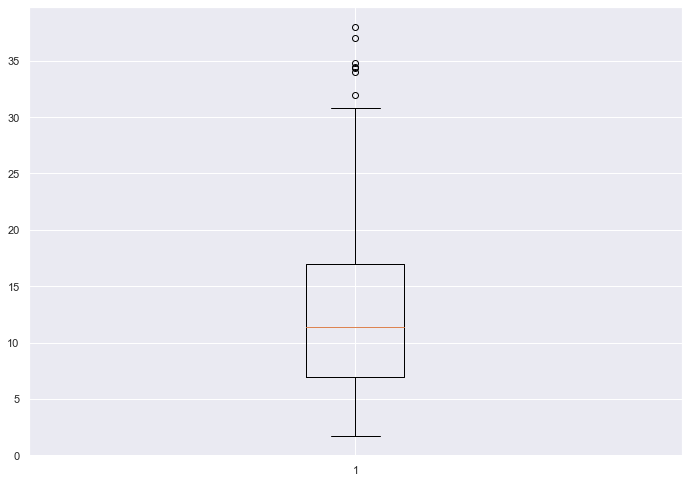

In [32]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['LSTAT'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d574b10dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d574896b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d574ebe550>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5748965f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d574ae6e10>],
 'means': []}

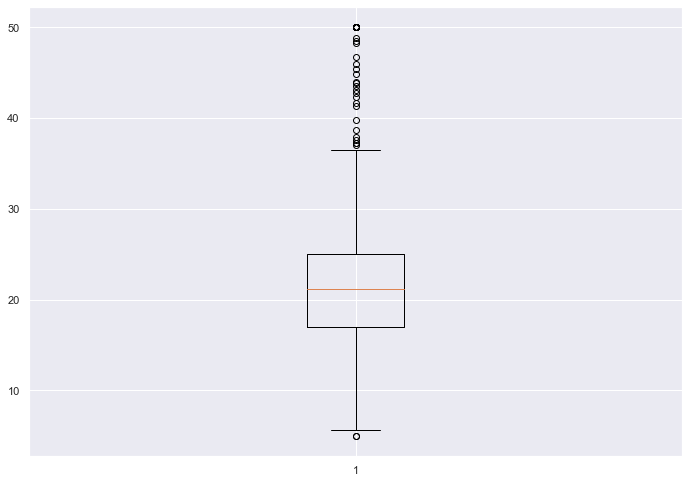

In [33]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['MEDV'])


## Infer

## predict

In [10]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [11]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

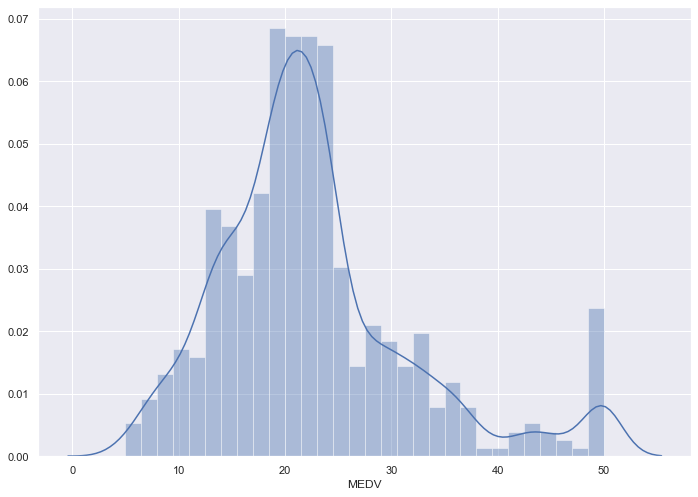

In [12]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

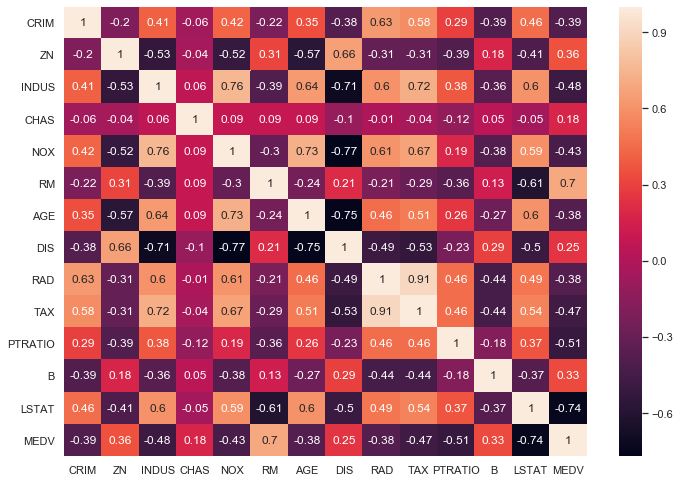

In [13]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

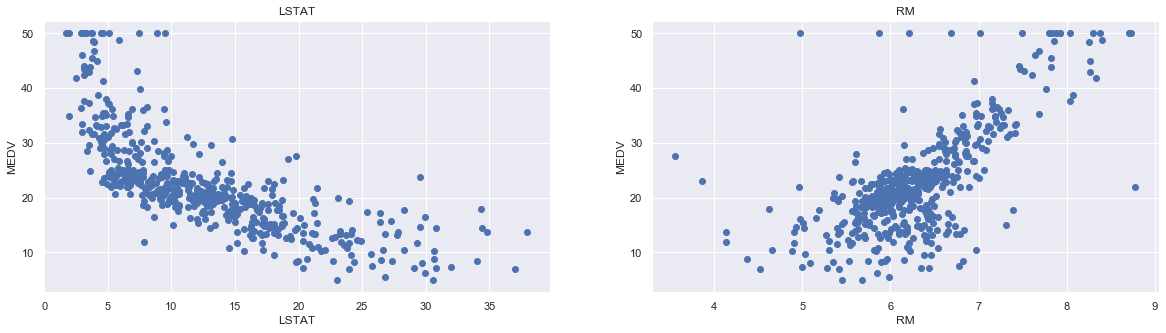

In [14]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')